# Part 1: Supply Data Analysis

## Sample Supply data info (Hourly DriverActivity.csv)

**Supply data:**

Shows aggregated driver activity in a city for a given period.

Details:

    Hourly data for 5 full weeks from 2016-11-14 until 2016-12-18
    Real data from a recent launch in a competitive city (2 big apps for years)
    
Fields:

    Date – date + hour for which the row of data is presented
    Active drivers – number of active drivers (any level of activity) available during time period
    Online (h) – total supply hours that were available during time period
    Has booking (h) – total hours during which drivers had a client booking (any state)
    Waiting for booking (h) – total hours which drivers spent waiting for booking
    Busy (h) – total hours which drivers were not available to take orders in
    Hours per active driver – average number of hours each driver was online during time period
    Rides per online hour – aka RPH – avg. finished trips per online hour during period
    Finished Rides – number of finished trips during period
    Note the data is sorted with more recent data first
    Note that is time period has 0 values in all columns, it would be skipped (no row)
    
**Demand data:**

Shows how many people saw a car in the app when setting the pickup marker on the map. If
you saw a car at one point and did not see a car later, you are counted in both columns in that
period.

Details:

    The data is from the same period as Supply data above.

Fields:

    Date – date + hour for which the row of data is presented
    People saw 0 cars (unique) – number of users who didn’t not see a car.
    People saw +1 cars (unique) – number of users who saw a car.
    Coverage Ratio (unique) – % of users who saw the car.
    Note the data is sorted with more recent data first
    Note that is time period has 0 values in all columns, it would be skipped (no row)

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

### 1. Data Preprocessing

In [3]:
supply = pd.read_csv(r"C:\Users\OMEN\Desktop\Bolt - Tallinn\Hourly_DriverActivity_1.csv - Hourly_DriverActivity_1.csv.csv")

In [4]:
supply.head()

,Date,Active drivers,Online (h),Has booking (h),Waiting for booking (h),Busy (h),Hours per active driver,Rides per online hour,Finished Rides
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0


In [5]:
supply.columns = supply.columns.str.lower()
supply.columns = supply.columns.str.replace(' ','_')

In [6]:
supply.head()

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides
0,2016-12-18 23,52,18,6,11,11,0.3,0.67,12.0
1,2016-12-18 22,59,20,11,9,12,0.3,1.40,28.0
2,2016-12-18 21,72,25,7,18,15,0.3,0.64,16.0
3,2016-12-18 20,86,29,7,23,15,0.3,0.52,15.0
4,2016-12-18 19,82,31,14,17,19,0.4,1.16,36.0


In [7]:
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     840 non-null    object 
 1   active_drivers           840 non-null    int64  
 2   online_(h)               840 non-null    int64  
 3   has_booking_(h)          840 non-null    int64  
 4   waiting_for_booking_(h)  840 non-null    int64  
 5   busy_(h)                 840 non-null    int64  
 6   hours_per_active_driver  840 non-null    float64
 7   rides_per_online_hour    840 non-null    float64
 8   finished_rides           795 non-null    float64
dtypes: float64(3), int64(5), object(1)
memory usage: 59.2+ KB


There are 45 null values in finished rides column. date should be converted od datetime dtype.

In [8]:
supply['date'] = pd.to_datetime(supply['date'],format='%Y-%m-%d %H')
supply.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     840 non-null    datetime64[ns]
 1   active_drivers           840 non-null    int64         
 2   online_(h)               840 non-null    int64         
 3   has_booking_(h)          840 non-null    int64         
 4   waiting_for_booking_(h)  840 non-null    int64         
 5   busy_(h)                 840 non-null    int64         
 6   hours_per_active_driver  840 non-null    float64       
 7   rides_per_online_hour    840 non-null    float64       
 8   finished_rides           795 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 59.2 KB


In [9]:
supply['hour'] = supply['date'].dt.hour
supply.head()

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour
0,2016-12-18 23:00:00,52,18,6,11,11,0.3,0.67,12.0,23
1,2016-12-18 22:00:00,59,20,11,9,12,0.3,1.40,28.0,22
2,2016-12-18 21:00:00,72,25,7,18,15,0.3,0.64,16.0,21
3,2016-12-18 20:00:00,86,29,7,23,15,0.3,0.52,15.0,20
4,2016-12-18 19:00:00,82,31,14,17,19,0.4,1.16,36.0,19


In [10]:
supply[supply.duplicated()]

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour


In [11]:
supply[supply.isna().any(axis=1)]

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour
16,2016-12-18 07:00:00,28,9,1,8,11,0.3,0.0,NaN,7
65,2016-12-16 06:00:00,17,4,0,3,5,0.2,0.0,NaN,6
91,2016-12-15 04:00:00,21,6,1,5,4,0.3,0.0,NaN,4
114,2016-12-14 05:00:00,17,6,0,6,6,0.4,0.0,NaN,5
115,2016-12-14 04:00:00,14,5,1,4,6,0.4,0.0,NaN,4
138,2016-12-13 05:00:00,13,4,0,4,5,0.3,0.0,NaN,5
139,2016-12-13 04:00:00,16,5,0,5,5,0.3,0.0,NaN,4
140,2016-12-13 03:00:00,14,5,0,4,6,0.4,0.0,NaN,3
162,2016-12-12 05:00:00,14,2,0,2,5,0.1,0.0,NaN,5
163,2016-12-12 04:00:00,9,2,0,2,4,0.2,0.0,NaN,4


In [12]:
supply[supply['has_booking_(h)']>supply['online_(h)']]

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour


In [13]:
demand = pd.read_csv(r"C:\Users\OMEN\Desktop\Bolt - Tallinn\Hourly_OverviewSearch_1.csv - Hourly_OverviewSearch_1.csv.csv")
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Date                         839 non-null    object
 1   People saw 0 cars (unique)   839 non-null    int64 
 2   People saw +1 cars (unique)  839 non-null    int64 
 3   Coverage Ratio (unique)      839 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 26.3+ KB


There are no missing values in demand table.But there is one record less than in supply table. Date fetaure shoud be converted to datetime.

In [14]:
demand['Date'] = pd.to_datetime(demand['Date'],format='%Y-%m-%d %H')
demand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Date                         839 non-null    datetime64[ns]
 1   People saw 0 cars (unique)   839 non-null    int64         
 2   People saw +1 cars (unique)  839 non-null    int64         
 3   Coverage Ratio (unique)      839 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 26.3 KB


In [15]:
demand.head()

,Date,People saw 0 cars (unique),People saw +1 cars (unique),Coverage Ratio (unique)
0,2016-12-18 23:00:00,9,32,78
1,2016-12-18 22:00:00,29,64,69
2,2016-12-18 21:00:00,5,39,89
3,2016-12-18 20:00:00,13,48,79
4,2016-12-18 19:00:00,12,77,87


In [16]:
demand.columns = demand.columns.str.lower()
demand.columns = demand.columns.str.replace(' ','_')

In [17]:
demand['hour'] = demand['date'].dt.hour

In [18]:
demand.head()

,date,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),hour
0,2016-12-18 23:00:00,9,32,78,23
1,2016-12-18 22:00:00,29,64,69,22
2,2016-12-18 21:00:00,5,39,89,21
3,2016-12-18 20:00:00,13,48,79,20
4,2016-12-18 19:00:00,12,77,87,19


In [19]:
demand[demand.duplicated()]

,date,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),hour


## 2. Exploratory data analysis

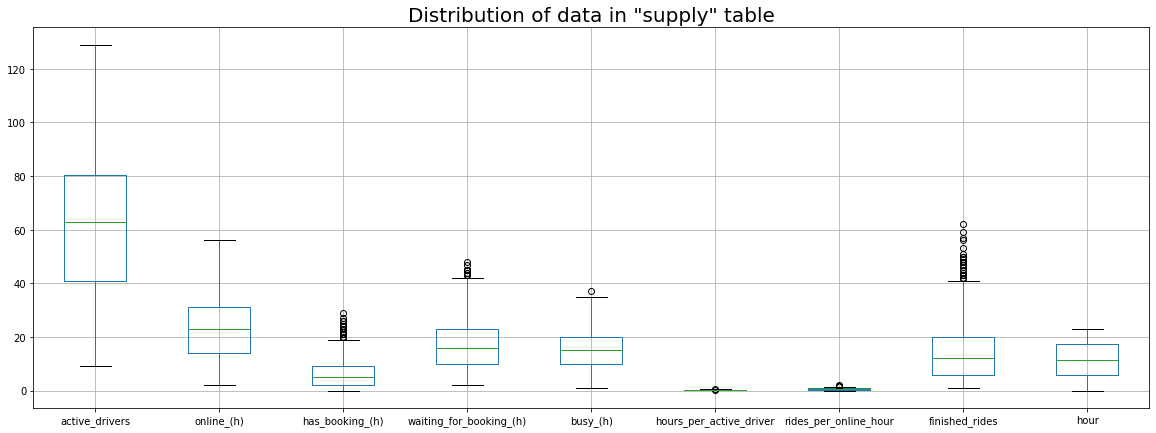

In [20]:
supply.boxplot(figsize=(20,7))
plt.title('Distribution of data in "supply" table',fontdict={'fontsize': 20})
plt.show()

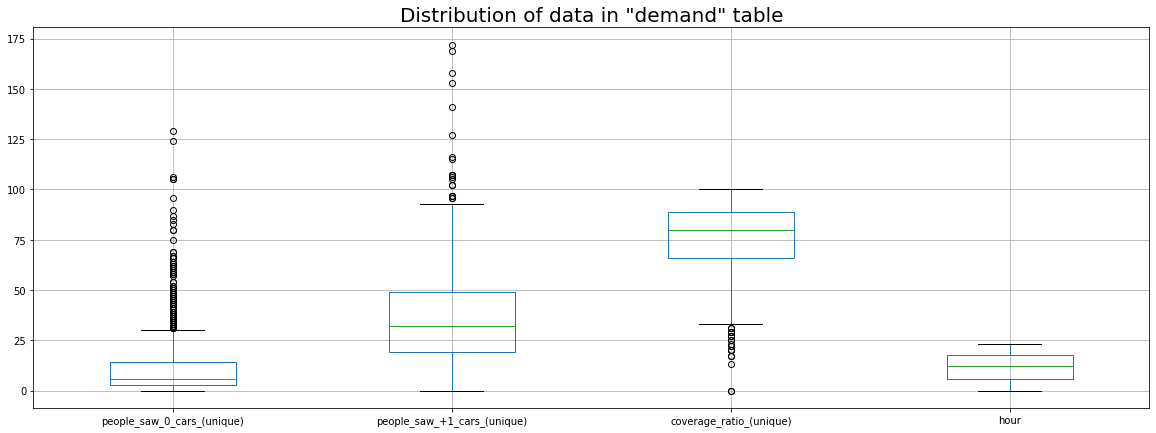

In [21]:
demand.boxplot(figsize=(20,7))
plt.title('Distribution of data in "demand" table',fontdict={'fontsize': 20})
plt.show()

**1. Show which 36 hours in a week are most undersupplied. Show/describe your decision based on sample data.**

In [22]:
supply['week'] = supply['date'].dt.isocalendar().week
supply['week_day'] = supply['date'].dt.dayofweek

In [23]:
supply.head()

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day
0,2016-12-18 23:00:00,52,18,6,11,11,0.3,0.67,12.0,23,50,6
1,2016-12-18 22:00:00,59,20,11,9,12,0.3,1.40,28.0,22,50,6
2,2016-12-18 21:00:00,72,25,7,18,15,0.3,0.64,16.0,21,50,6
3,2016-12-18 20:00:00,86,29,7,23,15,0.3,0.52,15.0,20,50,6
4,2016-12-18 19:00:00,82,31,14,17,19,0.4,1.16,36.0,19,50,6


In [24]:
demand.head()

,date,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),hour
0,2016-12-18 23:00:00,9,32,78,23
1,2016-12-18 22:00:00,29,64,69,22
2,2016-12-18 21:00:00,5,39,89,21
3,2016-12-18 20:00:00,13,48,79,20
4,2016-12-18 19:00:00,12,77,87,19


In [25]:
demand['non_coverage_ratio'] = round(demand['people_saw_0_cars_(unique)']/(demand['people_saw_0_cars_(unique)']+\
                                                                     demand['people_saw_+1_cars_(unique)'])*100,0).astype(int)
demand.head()

,date,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),hour,non_coverage_ratio
0,2016-12-18 23:00:00,9,32,78,23,22
1,2016-12-18 22:00:00,29,64,69,22,31
2,2016-12-18 21:00:00,5,39,89,21,11
3,2016-12-18 20:00:00,13,48,79,20,21
4,2016-12-18 19:00:00,12,77,87,19,13


In [26]:
data = supply.merge(demand[['date','people_saw_0_cars_(unique)','people_saw_+1_cars_(unique)','coverage_ratio_(unique)',\
                            'non_coverage_ratio']],on='date',how='left')
data.head()

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
0,2016-12-18 23:00:00,52,18,6,11,11,0.3,0.67,12.0,23,50,6,9.0,32.0,78.0,22.0
1,2016-12-18 22:00:00,59,20,11,9,12,0.3,1.40,28.0,22,50,6,29.0,64.0,69.0,31.0
2,2016-12-18 21:00:00,72,25,7,18,15,0.3,0.64,16.0,21,50,6,5.0,39.0,89.0,11.0
3,2016-12-18 20:00:00,86,29,7,23,15,0.3,0.52,15.0,20,50,6,13.0,48.0,79.0,21.0
4,2016-12-18 19:00:00,82,31,14,17,19,0.4,1.16,36.0,19,50,6,12.0,77.0,87.0,13.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 840 entries, 0 to 839
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   date                         840 non-null    datetime64[ns]
 1   active_drivers               840 non-null    int64         
 2   online_(h)                   840 non-null    int64         
 3   has_booking_(h)              840 non-null    int64         
 4   waiting_for_booking_(h)      840 non-null    int64         
 5   busy_(h)                     840 non-null    int64         
 6   hours_per_active_driver      840 non-null    float64       
 7   rides_per_online_hour        840 non-null    float64       
 8   finished_rides               795 non-null    float64       
 9   hour                         840 non-null    int64         
 10  week                         840 non-null    UInt32        
 11  week_day                     840 non-null    

There are 840 entries, which means 840 hours all together in 5 weeks. There are also missing values in finished_rides, people_saw_0_cars_(unique), people_saw_+1_cars_(unique), coverage_ratio_(unique) and non_coverage_ratio.

In [28]:
data[data['non_coverage_ratio'].isnull()]

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
282,2016-12-07 05:00:00,24,8,0,8,10,0.3,0.0,NaN,5,49,2,NaN,NaN,NaN,NaN


In [29]:
data[data.isna().any(axis=1)]

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
16,2016-12-18 07:00:00,28,9,1,8,11,0.3,0.0,NaN,7,50,6,1.0,4.0,80.0,20.0
65,2016-12-16 06:00:00,17,4,0,3,5,0.2,0.0,NaN,6,50,4,2.0,3.0,60.0,40.0
91,2016-12-15 04:00:00,21,6,1,5,4,0.3,0.0,NaN,4,50,3,5.0,3.0,38.0,62.0
114,2016-12-14 05:00:00,17,6,0,6,6,0.4,0.0,NaN,5,50,2,2.0,3.0,60.0,40.0
115,2016-12-14 04:00:00,14,5,1,4,6,0.4,0.0,NaN,4,50,2,3.0,3.0,50.0,50.0
138,2016-12-13 05:00:00,13,4,0,4,5,0.3,0.0,NaN,5,50,1,1.0,3.0,75.0,25.0
139,2016-12-13 04:00:00,16,5,0,5,5,0.3,0.0,NaN,4,50,1,0.0,1.0,100.0,0.0
140,2016-12-13 03:00:00,14,5,0,4,6,0.4,0.0,NaN,3,50,1,1.0,2.0,67.0,33.0
162,2016-12-12 05:00:00,14,2,0,2,5,0.1,0.0,NaN,5,50,0,2.0,0.0,0.0,100.0
163,2016-12-12 04:00:00,9,2,0,2,4,0.2,0.0,NaN,4,50,0,6.0,0.0,0.0,100.0


In [30]:
data.fillna(0,inplace=True)
len(data[data.isna().any(axis=1)])

0

I replaced the missing value with zero because the were no finished_rides or there were no users that saw any car in the app when setting the pickup marker on the map.

In [31]:
data.head()

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
0,2016-12-18 23:00:00,52,18,6,11,11,0.3,0.67,12.0,23,50,6,9.0,32.0,78.0,22.0
1,2016-12-18 22:00:00,59,20,11,9,12,0.3,1.40,28.0,22,50,6,29.0,64.0,69.0,31.0
2,2016-12-18 21:00:00,72,25,7,18,15,0.3,0.64,16.0,21,50,6,5.0,39.0,89.0,11.0
3,2016-12-18 20:00:00,86,29,7,23,15,0.3,0.52,15.0,20,50,6,13.0,48.0,79.0,21.0
4,2016-12-18 19:00:00,82,31,14,17,19,0.4,1.16,36.0,19,50,6,12.0,77.0,87.0,13.0


In [73]:
sorted_data = data.sort_values(by='rides_per_online_hour',ascending=False)
sorted_data.head()

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
46,2016-12-17 01:00:00,83,29,20,9,23,0.3,2.03,59.0,1,50,5,69.0,96.0,58.0,42.0
19,2016-12-18 04:00:00,46,16,12,4,15,0.3,1.88,30.0,4,50,6,47.0,55.0,54.0,46.0
43,2016-12-17 04:00:00,46,14,11,3,22,0.3,1.86,26.0,4,50,5,106.0,54.0,34.0,66.0
211,2016-12-10 04:00:00,37,11,7,4,13,0.3,1.82,20.0,4,49,5,69.0,37.0,35.0,65.0
44,2016-12-17 03:00:00,64,21,16,5,23,0.3,1.76,37.0,3,50,5,105.0,87.0,45.0,55.0


First I sorted data by the rides_per_online_hour with the highest rides_per_online_hour on the top. Hight rides_per_online_hour value; means these hours were busy. I called this data set; sorted_data.

In [81]:
undersupplied_36_hours = sorted_data[sorted_data['busy_(h)']>sorted_data['online_(h)']].head(36)
undersupplied_36_hours.head()

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
43,2016-12-17 04:00:00,46,14,11,3,22,0.3,1.86,26.0,4,50,5,106.0,54.0,34.0,66.0
211,2016-12-10 04:00:00,37,11,7,4,13,0.3,1.82,20.0,4,49,5,69.0,37.0,35.0,65.0
44,2016-12-17 03:00:00,64,21,16,5,23,0.3,1.76,37.0,3,50,5,105.0,87.0,45.0,55.0
78,2016-12-15 17:00:00,63,18,12,7,19,0.3,1.33,24.0,17,50,3,51.0,66.0,56.0,44.0
135,2016-12-13 08:00:00,40,13,11,2,15,0.3,1.31,17.0,8,50,1,80.0,32.0,29.0,71.0


In sorted data, I decided to look into data that has busy_hours greater than online_hours. This means demand is higher than the supply. undersupplied_36_hours are 36 most busy hours during all 5 weeks.

In [84]:
undersupplied_36_hours[['online_(h)','busy_(h)','rides_per_online_hour','coverage_ratio_(unique)','non_coverage_ratio']]\
.describe()

,online_(h),busy_(h),rides_per_online_hour,coverage_ratio_(unique),non_coverage_ratio
count,36.000000,36.000000,36.000000,36.000000,36.000000
mean,13.444444,16.555556,0.940278,56.222222,43.777778
std,6.826187,6.813618,0.369204,16.862657,16.862657
min,4.000000,7.000000,0.520000,23.000000,10.000000
25%,8.750000,11.750000,0.670000,43.500000,31.250000
50%,11.500000,14.500000,0.865000,56.000000,44.000000
75%,18.250000,20.250000,1.152500,68.750000,56.500000
max,32.000000,34.000000,1.860000,90.000000,77.000000


online value is mostly from 8 to 18 hours, busy hours are mostly from 11 to 20 hours, rides_per_online_hour value is mostly from 0.67 and 1.15, and coverage_ratio_ is mostly between 43 and 68% and non_coverage_ratio values mostly from 31 to 77%. So, there are great amount of data thata shows great ratio of users did't see any car in the application.

In [85]:
undersupplied_36_hours['hour'].describe()

count    36.000000
mean      9.694444
std       5.574531
min       1.000000
25%       4.750000
50%       8.000000
75%      14.250000
max      21.000000
Name: hour, dtype: float64

The most of undersupplied hours are between 4 and 14 hours.

In [77]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=undersupplied_36_hours.date, y=undersupplied_36_hours.hour,mode = 'markers',\
                         name = 'lines+markers', line = dict(color='purple',width=3)))
fig.update_layout(
    title="36 hours most undersupplied hours",
    xaxis_title="Date",
    yaxis_title="Hours",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    )
)
fig.show()

Here we can see visualization of all 5 weeks and the 36 most undersupplied hours during these weeks. For every point we can see exact date and time.

From this chart we can see that between 4 and 14 h are most undersuplied hourd during all 5 weeks. During 5th week; between December 11 and December 18, there are most of undersupplied hours. One of the reasons for this could be that the holidays are coming up and there are more people traveling around and consequently there is higher demand for ride-hailing. 

**2. 24-hour curve of average supply and demand (to illustrate match/mismatch).**

In [35]:
data.head()

,date,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
0,2016-12-18 23:00:00,52,18,6,11,11,0.3,0.67,12.0,23,50,6,9.0,32.0,78.0,22.0
1,2016-12-18 22:00:00,59,20,11,9,12,0.3,1.40,28.0,22,50,6,29.0,64.0,69.0,31.0
2,2016-12-18 21:00:00,72,25,7,18,15,0.3,0.64,16.0,21,50,6,5.0,39.0,89.0,11.0
3,2016-12-18 20:00:00,86,29,7,23,15,0.3,0.52,15.0,20,50,6,13.0,48.0,79.0,21.0
4,2016-12-18 19:00:00,82,31,14,17,19,0.4,1.16,36.0,19,50,6,12.0,77.0,87.0,13.0


In [88]:
avg_supply_and_demand= data.groupby(['hour']).agg(supply=('online_(h)','mean'),demand=('busy_(h)','mean'))
avg_supply_and_demand

,supply,demand
hour,,
0,24.657143,15.828571
1,20.428571,12.742857
2,15.857143,10.657143
3,12.742857,9.457143
4,10.314286,8.428571
5,9.742857,7.800000
6,9.028571,7.742857
7,12.085714,8.942857
8,17.314286,11.828571


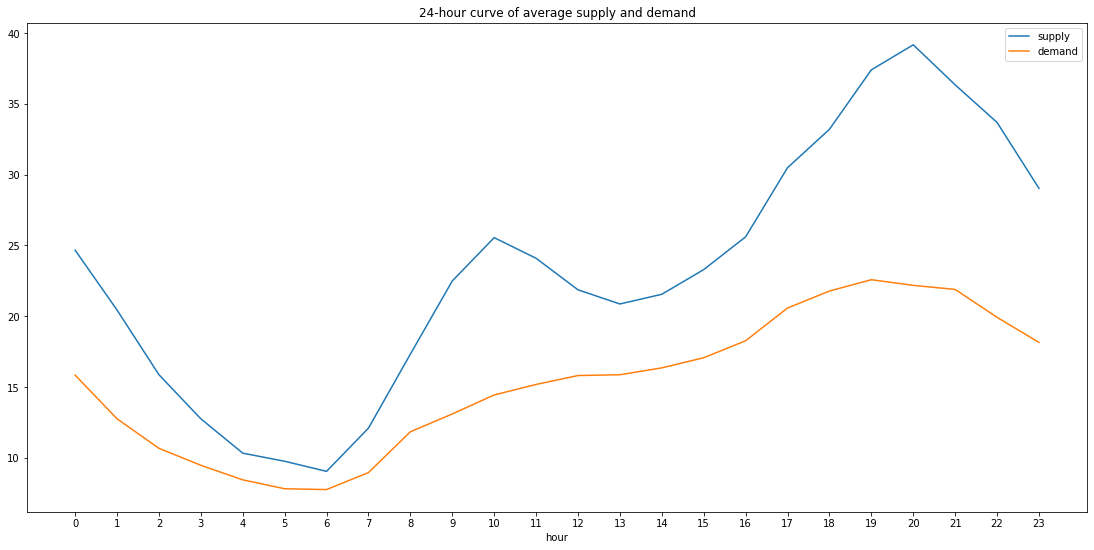

In [89]:
avg_supply_and_demand.plot(figsize=(19,9))
plt.title('24-hour curve of average supply and demand')
plt.xticks(range(0,24,1))
plt.show()

From this vusualization we can see that in the morning hours the average supply and demand is very close together.

Supply should be increased in the morning hours.

**3. Visualisation of hours where we lack supply during a weekly period. This one we can
send to drivers to show when to online for extra hours.**

In [39]:
new_data = data.set_index('date')
new_data.head()

,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
date,,,,,,,,,,,,,,,
2016-12-18 23:00:00,52,18,6,11,11,0.3,0.67,12.0,23,50,6,9.0,32.0,78.0,22.0
2016-12-18 22:00:00,59,20,11,9,12,0.3,1.40,28.0,22,50,6,29.0,64.0,69.0,31.0
2016-12-18 21:00:00,72,25,7,18,15,0.3,0.64,16.0,21,50,6,5.0,39.0,89.0,11.0
2016-12-18 20:00:00,86,29,7,23,15,0.3,0.52,15.0,20,50,6,13.0,48.0,79.0,21.0
2016-12-18 19:00:00,82,31,14,17,19,0.4,1.16,36.0,19,50,6,12.0,77.0,87.0,13.0


In [40]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 840 entries, 2016-12-18 23:00:00 to 2016-11-14 00:00:00
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   active_drivers               840 non-null    int64  
 1   online_(h)                   840 non-null    int64  
 2   has_booking_(h)              840 non-null    int64  
 3   waiting_for_booking_(h)      840 non-null    int64  
 4   busy_(h)                     840 non-null    int64  
 5   hours_per_active_driver      840 non-null    float64
 6   rides_per_online_hour        840 non-null    float64
 7   finished_rides               840 non-null    float64
 8   hour                         840 non-null    int64  
 9   week                         840 non-null    UInt32 
 10  week_day                     840 non-null    int64  
 11  people_saw_0_cars_(unique)   840 non-null    float64
 12  people_saw_+1_cars_(unique)  840 non-null

In [93]:
Y = new_data.sort_values(by='rides_per_online_hour',ascending=False)
low_supply_hours = Y[Y['busy_(h)']>Y['online_(h)']]
low_supply_hours.head()

,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
date,,,,,,,,,,,,,,,
2016-12-17 04:00:00,46,14,11,3,22,0.3,1.86,26.0,4,50,5,106.0,54.0,34.0,66.0
2016-12-10 04:00:00,37,11,7,4,13,0.3,1.82,20.0,4,49,5,69.0,37.0,35.0,65.0
2016-12-17 03:00:00,64,21,16,5,23,0.3,1.76,37.0,3,50,5,105.0,87.0,45.0,55.0
2016-12-15 17:00:00,63,18,12,7,19,0.3,1.33,24.0,17,50,3,51.0,66.0,56.0,44.0
2016-12-13 08:00:00,40,13,11,2,15,0.3,1.31,17.0,8,50,1,80.0,32.0,29.0,71.0


In [94]:
low_supply_hours.week.unique()

<IntegerArray>
[50, 49, 46, 48, 47]
Length: 5, dtype: UInt32

In [95]:
XXX = pd.pivot_table(data=low_supply_hours, index=low_supply_hours.index,columns='week',values='hour')
XXX

week,46,47,48,49,50
date,,,,,
2016-11-14 01:00:00,1.0,NaN,NaN,NaN,NaN
2016-11-14 02:00:00,2.0,NaN,NaN,NaN,NaN
2016-11-15 14:00:00,14.0,NaN,NaN,NaN,NaN
2016-11-15 15:00:00,15.0,NaN,NaN,NaN,NaN
2016-11-15 16:00:00,16.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2016-12-17 05:00:00,NaN,NaN,NaN,NaN,5.0
2016-12-17 06:00:00,NaN,NaN,NaN,NaN,6.0
2016-12-17 10:00:00,NaN,NaN,NaN,NaN,10.0


In [96]:
XXX.reset_index()

week,date,46,47,48,49,50
0,2016-11-14 01:00:00,1.0,NaN,NaN,NaN,NaN
1,2016-11-14 02:00:00,2.0,NaN,NaN,NaN,NaN
2,2016-11-15 14:00:00,14.0,NaN,NaN,NaN,NaN
3,2016-11-15 15:00:00,15.0,NaN,NaN,NaN,NaN
4,2016-11-15 16:00:00,16.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
86,2016-12-17 05:00:00,NaN,NaN,NaN,NaN,5.0
87,2016-12-17 06:00:00,NaN,NaN,NaN,NaN,6.0
88,2016-12-17 10:00:00,NaN,NaN,NaN,NaN,10.0
89,2016-12-18 07:00:00,NaN,NaN,NaN,NaN,7.0


In [99]:

fig = make_subplots(rows=5, cols=1,shared_xaxes=True,vertical_spacing=0.05,\
                    subplot_titles=("Week 46: Nov 14 - Nov 20", "Week 47: Nov 21 - Nov 27",\
                                    "Week 48: Nov 28 - Dec 4","Week 49: Dec 5 - Dec 11","Week 45: Dec 12 - Dec 18"))

fig.append_trace(go.Scatter(
    x=XXX[46].index,
    y=XXX[46],mode="markers"
), row=1, col=1)

fig.append_trace(go.Scatter(
    x=XXX[47].index,
    y=XXX[47],mode="markers"
), row=2, col=1)

fig.append_trace(go.Scatter(
    x=XXX[48].index,
    y=XXX[48],mode="markers"
), row=3, col=1)

fig.append_trace(go.Scatter(
    x=XXX[49].index,
    y=XXX[49],mode="markers"
), row=4, col=1)

fig.append_trace(go.Scatter(
    x=XXX[50].index,
    y=XXX[50],mode="markers"
), row=5, col=1)


fig.update_xaxes(title_text="Date", row=5, col=1)

fig.update_yaxes(title_text="hour", row=1, col=1)
fig.update_yaxes(title_text="hour", row=2, col=1)
fig.update_yaxes(title_text="hour", row=3, col=1)
fig.update_yaxes(title_text="hour", row=4, col=1)
fig.update_yaxes(title_text="hour", row=5, col=1)

fig.update_layout(height=1000, width=1000, title_text="Most undersuplied hours during week 46, 47, 48, 49 and 50")
fig.show()

Drivers can easily read from this chart which hours are the most undersupplied for every week.

**4. Estimate number of hours needed to ensure we have a high Coverage Ratio during most
peak hours.**

In [100]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 840 entries, 2016-12-18 23:00:00 to 2016-11-14 00:00:00
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   active_drivers               840 non-null    int64  
 1   online_(h)                   840 non-null    int64  
 2   has_booking_(h)              840 non-null    int64  
 3   waiting_for_booking_(h)      840 non-null    int64  
 4   busy_(h)                     840 non-null    int64  
 5   hours_per_active_driver      840 non-null    float64
 6   rides_per_online_hour        840 non-null    float64
 7   finished_rides               840 non-null    float64
 8   hour                         840 non-null    int64  
 9   week                         840 non-null    UInt32 
 10  week_day                     840 non-null    int64  
 11  people_saw_0_cars_(unique)   840 non-null    float64
 12  people_saw_+1_cars_(unique)  840 non-null

In [101]:
high_coverage_ratio = new_data[new_data['coverage_ratio_(unique)']>65]
high_coverage_ratio.head()

,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
date,,,,,,,,,,,,,,,
2016-12-18 23:00:00,52,18,6,11,11,0.3,0.67,12.0,23,50,6,9.0,32.0,78.0,22.0
2016-12-18 22:00:00,59,20,11,9,12,0.3,1.40,28.0,22,50,6,29.0,64.0,69.0,31.0
2016-12-18 21:00:00,72,25,7,18,15,0.3,0.64,16.0,21,50,6,5.0,39.0,89.0,11.0
2016-12-18 20:00:00,86,29,7,23,15,0.3,0.52,15.0,20,50,6,13.0,48.0,79.0,21.0
2016-12-18 19:00:00,82,31,14,17,19,0.4,1.16,36.0,19,50,6,12.0,77.0,87.0,13.0


In [102]:
high_coverage_ratio[['online_(h)','busy_(h)','coverage_ratio_(unique)']].describe()

,online_(h),busy_(h),coverage_ratio_(unique)
count,633.000000,633.000000,633.000000
mean,26.248025,16.624013,84.301738
std,10.170544,6.029794,9.353583
min,4.000000,1.000000,66.000000
25%,19.000000,12.000000,78.000000
50%,26.000000,17.000000,85.000000
75%,33.000000,21.000000,91.000000
max,56.000000,37.000000,100.000000


For the high coverage_ratio (greater than 65%) we see that the minimum of online hour is 4 and maximum is 56. Mean value is 26 online hours.

Busy hours are mostly between 12 and 21 hours, which is mostly less than online hours values.

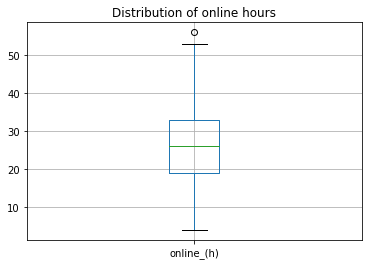

In [103]:
high_coverage_ratio.boxplot(column='online_(h)')
plt.title('Distribution of online hours')
plt.show()

We can see that for the most of the high coverage_ratio, there are mostly 19 to 26 online hours for a time period. I would recommend online hours to be from 20 to 30 during most peak hours.

**5. Calculate levels of guaranteed hourly earnings we can offer to drivers during 36 weekly
hours with highest demand without losing money + how much extra hours we want to get
to capture missed demand.**

a. Assume that Finished Rides have an average value of €10 (80% goes to driver, 20% is our revenue).

b. Assume the same level of demand with increased supply, base it on RPH over 3 hour periods, but with increased supply.

c. Assume that with extra hours we will capture “missed coverage” or people
attributed to “People saw 0 cars” in demand data.

In [139]:
week_50 = new_data[new_data['week']==50]
week_50

,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
date,,,,,,,,,,,,,,,
2016-12-18 23:00:00,52,18,6,11,11,0.3,0.67,12.0,23,50,6,9.0,32.0,78.0,22.0
2016-12-18 22:00:00,59,20,11,9,12,0.3,1.40,28.0,22,50,6,29.0,64.0,69.0,31.0
2016-12-18 21:00:00,72,25,7,18,15,0.3,0.64,16.0,21,50,6,5.0,39.0,89.0,11.0
2016-12-18 20:00:00,86,29,7,23,15,0.3,0.52,15.0,20,50,6,13.0,48.0,79.0,21.0
2016-12-18 19:00:00,82,31,14,17,19,0.4,1.16,36.0,19,50,6,12.0,77.0,87.0,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-12 04:00:00,9,2,0,2,4,0.2,0.00,0.0,4,50,0,6.0,0.0,0.0,100.0
2016-12-12 03:00:00,12,3,0,3,3,0.3,0.00,0.0,3,50,0,5.0,2.0,29.0,71.0
2016-12-12 02:00:00,20,6,0,6,5,0.3,0.17,1.0,2,50,0,5.0,5.0,50.0,50.0


In [141]:
week_50 = week_50.sort_values(by=['rides_per_online_hour'],ascending=False)
week_50

,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
date,,,,,,,,,,,,,,,
2016-12-17 01:00:00,83,29,20,9,23,0.3,2.03,59.0,1,50,5,69.0,96.0,58.0,42.0
2016-12-18 04:00:00,46,16,12,4,15,0.3,1.88,30.0,4,50,6,47.0,55.0,54.0,46.0
2016-12-17 04:00:00,46,14,11,3,22,0.3,1.86,26.0,4,50,5,106.0,54.0,34.0,66.0
2016-12-17 03:00:00,64,21,16,5,23,0.3,1.76,37.0,3,50,5,105.0,87.0,45.0,55.0
2016-12-15 18:00:00,59,25,21,4,17,0.4,1.72,43.0,18,50,3,124.0,72.0,37.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-13 04:00:00,16,5,0,5,5,0.3,0.00,0.0,4,50,1,0.0,1.0,100.0,0.0
2016-12-15 04:00:00,21,6,1,5,4,0.3,0.00,0.0,4,50,3,5.0,3.0,38.0,62.0
2016-12-14 05:00:00,17,6,0,6,6,0.4,0.00,0.0,5,50,2,2.0,3.0,60.0,40.0


In [145]:
week_50 = week_50[week_50['busy_(h)']>week_50['online_(h)']].head(36)
week_50

,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio
date,,,,,,,,,,,,,,,
2016-12-17 04:00:00,46,14,11,3,22,0.3,1.86,26.0,4,50,5,106.0,54.0,34.0,66.0
2016-12-17 03:00:00,64,21,16,5,23,0.3,1.76,37.0,3,50,5,105.0,87.0,45.0,55.0
2016-12-15 17:00:00,63,18,12,7,19,0.3,1.33,24.0,17,50,3,51.0,66.0,56.0,44.0
2016-12-13 08:00:00,40,13,11,2,15,0.3,1.31,17.0,8,50,1,80.0,32.0,29.0,71.0
2016-12-16 04:00:00,24,4,2,3,7,0.2,1.25,5.0,4,50,4,18.0,13.0,42.0,58.0
2016-12-13 07:00:00,39,8,4,4,14,0.2,1.13,9.0,7,50,1,24.0,14.0,37.0,63.0
2016-12-16 03:00:00,23,6,3,2,11,0.3,1.00,6.0,3,50,4,59.0,18.0,23.0,77.0
2016-12-17 10:00:00,28,6,2,3,8,0.2,1.00,6.0,10,50,5,36.0,18.0,33.0,67.0
2016-12-14 02:00:00,24,4,2,2,10,0.2,1.00,4.0,2,50,2,10.0,11.0,52.0,48.0


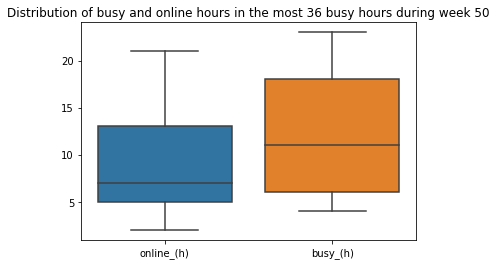

In [146]:
sns.boxplot(data=week_50[['online_(h)','busy_(h)']])
plt.title('Distribution of busy and online hours in the most 36 busy hours during week 50')
plt.show()

We can see that mean of busy hours is much greater than mean of online hours.

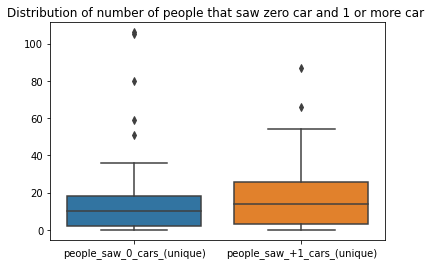

In [147]:
sns.boxplot(data=week_50[['people_saw_0_cars_(unique)','people_saw_+1_cars_(unique)']])
plt.title('Distribution of number of people that saw zero car and 1 or more car ')
plt.show()

During high demand there are much more people that saw 0 car than people that saw 1 or more cars.

**a. Assume that Finished Rides have an average value of €10 (80% goes to driver, 20% is our revenue).**

In [155]:
week_50.head()

,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio,avg_rides_per_active_driver,driver_earnings
date,,,,,,,,,,,,,,,,,
2016-12-17 04:00:00,46,14,11,3,22,0.3,1.86,26.0,4,50,5,106.0,54.0,34.0,66.0,0.565217,14.88
2016-12-17 03:00:00,64,21,16,5,23,0.3,1.76,37.0,3,50,5,105.0,87.0,45.0,55.0,0.578125,14.08
2016-12-15 17:00:00,63,18,12,7,19,0.3,1.33,24.0,17,50,3,51.0,66.0,56.0,44.0,0.380952,10.64
2016-12-13 08:00:00,40,13,11,2,15,0.3,1.31,17.0,8,50,1,80.0,32.0,29.0,71.0,0.425000,10.48
2016-12-16 04:00:00,24,4,2,3,7,0.2,1.25,5.0,4,50,4,18.0,13.0,42.0,58.0,0.208333,10.00


In [154]:
week_50['driver_earnings'] = week_50['rides_per_online_hour']*8
week_50.head()

,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio,avg_rides_per_active_driver,driver_earnings
date,,,,,,,,,,,,,,,,,
2016-12-17 04:00:00,46,14,11,3,22,0.3,1.86,26.0,4,50,5,106.0,54.0,34.0,66.0,0.565217,14.88
2016-12-17 03:00:00,64,21,16,5,23,0.3,1.76,37.0,3,50,5,105.0,87.0,45.0,55.0,0.578125,14.08
2016-12-15 17:00:00,63,18,12,7,19,0.3,1.33,24.0,17,50,3,51.0,66.0,56.0,44.0,0.380952,10.64
2016-12-13 08:00:00,40,13,11,2,15,0.3,1.31,17.0,8,50,1,80.0,32.0,29.0,71.0,0.425000,10.48
2016-12-16 04:00:00,24,4,2,3,7,0.2,1.25,5.0,4,50,4,18.0,13.0,42.0,58.0,0.208333,10.00


I added feature avg_rides_per_active_driver.

In [156]:
week_50['driver_earnings'].sum()

160.64

This would be driver's earnings during 36 weekly hours with highest demand.

**b. Assume the same level of demand with increased supply, base it on RPH over 3 hour periods, but with increased supply.**

I don't know what means increased supply, should online hours be increased? I can assume more supply would mean that there are more active drivers and and they can finish more drives because then they give service mostly to the customers that are near him. This would increase RPH and driver's earnings would be higher than with lower supply.

In [157]:
week_50['rides_per_online_hour'].describe()

count    33.000000
mean      0.608485
std       0.512159
min       0.000000
25%       0.250000
50%       0.500000
75%       1.000000
max       1.860000
Name: rides_per_online_hour, dtype: float64

In [158]:
week_50.head()

,active_drivers,online_(h),has_booking_(h),waiting_for_booking_(h),busy_(h),hours_per_active_driver,rides_per_online_hour,finished_rides,hour,week,week_day,people_saw_0_cars_(unique),people_saw_+1_cars_(unique),coverage_ratio_(unique),non_coverage_ratio,avg_rides_per_active_driver,driver_earnings
date,,,,,,,,,,,,,,,,,
2016-12-17 04:00:00,46,14,11,3,22,0.3,1.86,26.0,4,50,5,106.0,54.0,34.0,66.0,0.565217,14.88
2016-12-17 03:00:00,64,21,16,5,23,0.3,1.76,37.0,3,50,5,105.0,87.0,45.0,55.0,0.578125,14.08
2016-12-15 17:00:00,63,18,12,7,19,0.3,1.33,24.0,17,50,3,51.0,66.0,56.0,44.0,0.380952,10.64
2016-12-13 08:00:00,40,13,11,2,15,0.3,1.31,17.0,8,50,1,80.0,32.0,29.0,71.0,0.425000,10.48
2016-12-16 04:00:00,24,4,2,3,7,0.2,1.25,5.0,4,50,4,18.0,13.0,42.0,58.0,0.208333,10.00


In [159]:
week_50['incresed_rph'] = week_50['rides_per_online_hour']*1.2

Let's assume that with the increased supply, the rides_per_online_hour increase for 20%. Increased rides_per_online_hour is shown through incresed_rph column.

In [162]:
week_50.incresed_rph.describe()

count    33.000000
mean      0.730182
std       0.614591
min       0.000000
25%       0.300000
50%       0.600000
75%       1.200000
max       2.232000
Name: incresed_rph, dtype: float64

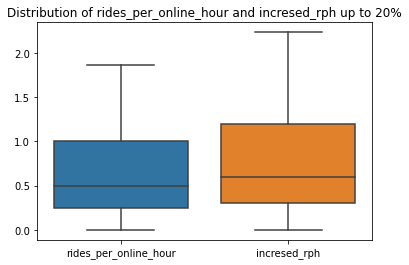

In [164]:
sns.boxplot(data=week_50[['rides_per_online_hour','incresed_rph']])
plt.title('Distribution of rides_per_online_hour and incresed_rph up to 20%')
plt.show()

Increasing the values of rides_per_online_hour, mean value obviously increases.

In [165]:
week_50['incresed_rph'].sum()*8

192.768

With increased supply driver's earnings also increased during the high demand hours.

**CONCLUSION**

Supply represents number of online hours and demand represents number of busy hours even though I am really not sure in my answer. I feel that I miss a lot of core undrestanding of ride-hailing business to understand the core metrics.

I miss metric for example number_of_users_using_ride_service per online hour. Then I would have number of active drivers per online hour and could compare these two metrics. I feel that number of people taht saw or did't saw the car doesn't say how many of users actually used the ride services.

I showed 36 undersupplied hours during all 5 weeks, I think it would be even more efficient if I showed it for every week individualy. I miss the experience to be quicker and more productive.